# 500_RQ1_Analysis

In [1]:
import os.path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [2]:
RQ1 = pd.read_csv('../../data/analysis/RQ1.csv')

In [3]:
RQ1 = RQ1.drop(RQ1.columns[[0]], axis=1)

In [96]:
RQ1.head(5)

,Players,club,league,age,nationality,Position,overall,potential,eur_value,injury_prone_trait,Previous Average Form,Current Average Form,Apps This Season,Plays in Top 5 Leagues,Homegrown
0,Lionel Messi,FC Barcelona,Spanish Primera Division,30,Argentina,Forward,93,93,105000000.0,False,8.255952,7.375000,32.0,True,False
1,Cristiano Ronaldo,Real Madrid CF,Spanish Primera Division,32,Portugal,Forward,94,94,95500000.0,False,7.926829,7.280000,25.0,True,False
2,Luis Suarez,FC Barcelona,Spanish Primera Division,30,Uruguay,Forward,92,92,97000000.0,False,7.018182,6.535714,28.0,True,False
3,Zlatan Ibrahimovic,Manchester United,English Premier League,35,Sweden,Forward,88,88,27000000.0,False,6.900000,1.200000,5.0,True,False
4,Robert Lewandowski,FC Bayern Munich,German Bundesliga,28,Poland,Forward,91,91,92000000.0,False,6.050000,6.785714,28.0,True,False


In [5]:
RQ1.groupby(['overall']).count()['Players']

overall
62      1
63      3
64      6
65      9
66      8
67     17
68     28
69     42
70     73
71     97
72    137
73    146
74    151
75    157
76    141
77    164
78    101
79    107
80     96
81     61
82     83
83     52
84     28
85     22
86     18
87     10
88     14
89      8
90      5
91      1
92      3
93      1
94      1
Name: Players, dtype: int64

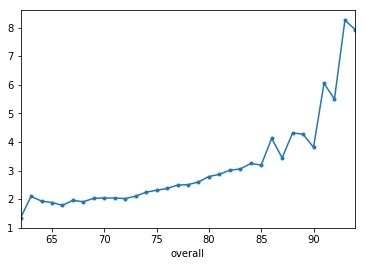

In [6]:
o = RQ1.groupby(['overall']).mean()['Previous Average Form']
o.plot(style='.-')

In [7]:
RQ1['Previous Average Form'].corr(RQ1['overall'])

0.61854072490897716

## Goalkeepers

In [8]:
RQ1_Goalkeepers = RQ1[RQ1['Position'] == 'Goalkeeper']

In [9]:
RQ1_Goalkeepers.groupby(['overall']).count()['Players']

overall
66     3
67     1
68     1
69     1
70     5
71     3
72     9
73     3
74    13
75     7
76     6
77    11
78     5
79    11
80    10
81     8
82    12
83     7
84     4
85     5
86     1
87     1
88     2
89     2
90     1
92     1
Name: Players, dtype: int64

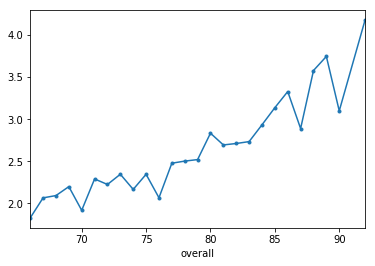

In [10]:
gk = RQ1_Goalkeepers.groupby(['overall']).mean()['Previous Average Form']
gk.plot(style='.-')

In [11]:
RQ1_Goalkeepers['Previous Average Form'].corr(RQ1_Goalkeepers['overall'])

0.68849995414859977

In [12]:
RQ1_Goalkeepers.groupby(['overall']).count()['Players']

overall
66     3
67     1
68     1
69     1
70     5
71     3
72     9
73     3
74    13
75     7
76     6
77    11
78     5
79    11
80    10
81     8
82    12
83     7
84     4
85     5
86     1
87     1
88     2
89     2
90     1
92     1
Name: Players, dtype: int64

In [13]:
worldclass_goalkeepers = RQ1_Goalkeepers[RQ1_Goalkeepers['overall']>84]
average_goalkeepers = RQ1_Goalkeepers[RQ1_Goalkeepers['overall']<85]

In [14]:
x = worldclass_goalkeepers['overall'].values[:,np.newaxis]
y = worldclass_goalkeepers['Previous Average Form'].values
worldclass_goalkeepers_model = LinearRegression()
worldclass_goalkeepers_model.fit(x, y)

w = average_goalkeepers['overall'].values[:,np.newaxis]
z = average_goalkeepers['Previous Average Form'].values
average_goalkeepers_model = LinearRegression()
average_goalkeepers_model.fit(w, z)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [15]:
average_goalkeepers["Distance"] = average_goalkeepers['Previous Average Form'].values - average_goalkeepers_model.predict(average_goalkeepers['overall'].values[:,np.newaxis])
worldclass_goalkeepers["Distance"] = worldclass_goalkeepers['Previous Average Form'].values - worldclass_goalkeepers_model.predict(worldclass_goalkeepers['overall'].values[:,np.newaxis])

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [16]:
pos_dist_gk0 = average_goalkeepers[average_goalkeepers['Distance']>=0]['Distance'].mean()
pos_dist_gk1 = worldclass_goalkeepers[worldclass_goalkeepers['Distance']>=0]['Distance'].mean()

neg_dist_gk0 = average_goalkeepers[average_goalkeepers['Distance']<0]['Distance'].mean()
neg_dist_gk1 = worldclass_goalkeepers[worldclass_goalkeepers['Distance']<0]['Distance'].mean()

In [17]:
pos_dist_gk0

0.27729470928126004

In [18]:
underrated_average_gk = average_goalkeepers[average_goalkeepers['Distance']>(pos_dist_gk0*2)]
underrated_worldclass_gk = worldclass_goalkeepers[worldclass_goalkeepers['Distance']>pos_dist_gk1]

overrated_average_gk = average_goalkeepers[average_goalkeepers['Distance']<(neg_dist_gk0*2)]
overrated_worldclass_gk = worldclass_goalkeepers[worldclass_goalkeepers['Distance']<neg_dist_gk1]

In [19]:
underrated_average_gk['Predicted Form (FIFA)'] = average_goalkeepers_model.predict(underrated_average_gk['overall'].values[:,np.newaxis])
underrated_worldclass_gk['Predicted Form (FIFA)'] = worldclass_goalkeepers_model.predict(underrated_worldclass_gk['overall'].values[:,np.newaxis])

overrated_average_gk['Predicted Form (FIFA)'] = average_goalkeepers_model.predict(overrated_average_gk['overall'].values[:,np.newaxis])
overrated_worldclass_gk['Predicted Form (FIFA)'] = worldclass_goalkeepers_model.predict(overrated_worldclass_gk['overall'].values[:,np.newaxis])

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/p

In [20]:
underrated_average_gk['Predicted Form (Us)'] = underrated_average_gk['Previous Average Form']
underrated_worldclass_gk['Predicted Form (Us)'] = underrated_worldclass_gk['Previous Average Form']

overrated_average_gk['Predicted Form (Us)'] = overrated_average_gk['Previous Average Form']
overrated_worldclass_gk['Predicted Form (Us)'] = overrated_worldclass_gk['Previous Average Form']

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/p

In [21]:
underrated_goalkeepers = pd.concat([underrated_average_gk ,underrated_worldclass_gk ],axis=0)

overrated_goalkeepers = pd.concat([overrated_average_gk ,overrated_worldclass_gk ],axis=0)

In [95]:
underrated_goalkeepers.sort_values('Distance', ascending=False).reset_index().drop('index',1)
underrated_goalkeepers.head(5)

,Players,club,league,age,nationality,Position,overall,potential,eur_value,injury_prone_trait,Previous Average Form,Current Average Form,Apps This Season,Plays in Top 5 Leagues,Homegrown,Distance,Predicted Form (FIFA),Predicted Form (Us)
165,Salvatore Sirigu,Torino,Italian Serie A,30,Italy,Goalkeeper,79,79,8000000.0,False,3.417323,2.969697,33.0,True,True,0.852747,2.564576,3.417323
202,Vincent Enyeama,LOSC Lille,French Ligue 1,34,Nigeria,Goalkeeper,80,80,6000000.0,False,3.300699,0.000000,0.0,True,False,0.677993,2.622706,3.300699
218,Alphonse Areola,Paris Saint-Germain,French Ligue 1,24,France,Goalkeeper,80,86,15000000.0,False,3.258824,0.000000,0.0,True,True,0.636117,2.622706,3.258824
244,Fraser Forster,Southampton,English Premier League,29,England,Goalkeeper,77,78,7000000.0,False,3.186047,2.350000,20.0,True,True,0.737731,2.448315,3.186047
271,David Ospina,Arsenal,English Premier League,28,Colombia,Goalkeeper,79,79,9000000.0,False,3.141026,3.500000,2.0,True,False,0.576450,2.564576,3.141026


In [94]:
overrated_goalkeepers.sort_values('Distance', ascending=True).reset_index().drop('index',1)
overrated_goalkeepers.head(5)

,Players,club,league,age,nationality,Position,overall,potential,eur_value,injury_prone_trait,Previous Average Form,Current Average Form,Apps This Season,Plays in Top 5 Leagues,Homegrown,Distance,Predicted Form (FIFA),Predicted Form (Us)
1411,Rene Adler,1. FSV Mainz 05,German Bundesliga,32,Germany,Goalkeeper,79,79,7000000.0,True,1.905983,2.416667,12.0,True,True,-0.658593,2.564576,1.905983
1469,Guillermo Ochoa,Standard de Liege,Belgian First Division A,31,Mexico,Goalkeeper,79,79,7500000.0,False,1.854839,0.000000,0.0,False,False,-0.709737,2.564576,1.854839
1586,Ron-Robert Zieler,VfB Stuttgart,German Bundesliga,28,Germany,Goalkeeper,79,80,10000000.0,False,1.737931,2.935484,31.0,True,True,-0.826645,2.564576,1.737931
1740,Francesco Bardi,Frosinone,Italian Serie B,25,Italy,Goalkeeper,76,79,7000000.0,False,1.444444,0.000000,0.0,False,True,-0.945740,2.390185,1.444444
1757,Felix Wiedwald,Leeds United,English Championship,27,Germany,Goalkeeper,74,76,4600000.0,False,1.338028,0.000000,0.0,False,True,-0.935896,2.273924,1.338028


In [24]:
t1 = underrated_average_gk['overall'].values[:,np.newaxis] 
t2 = underrated_average_gk['Previous Average Form'].values 
t3 = overrated_average_gk['overall'].values[:,np.newaxis] 
t4 = overrated_average_gk['Previous Average Form'].values 
s1 = underrated_worldclass_gk['overall'].values[:,np.newaxis] 
s2 = underrated_worldclass_gk['Previous Average Form'].values 
s3 = overrated_worldclass_gk['overall'].values[:,np.newaxis] 
s4 = overrated_worldclass_gk['Previous Average Form'].values

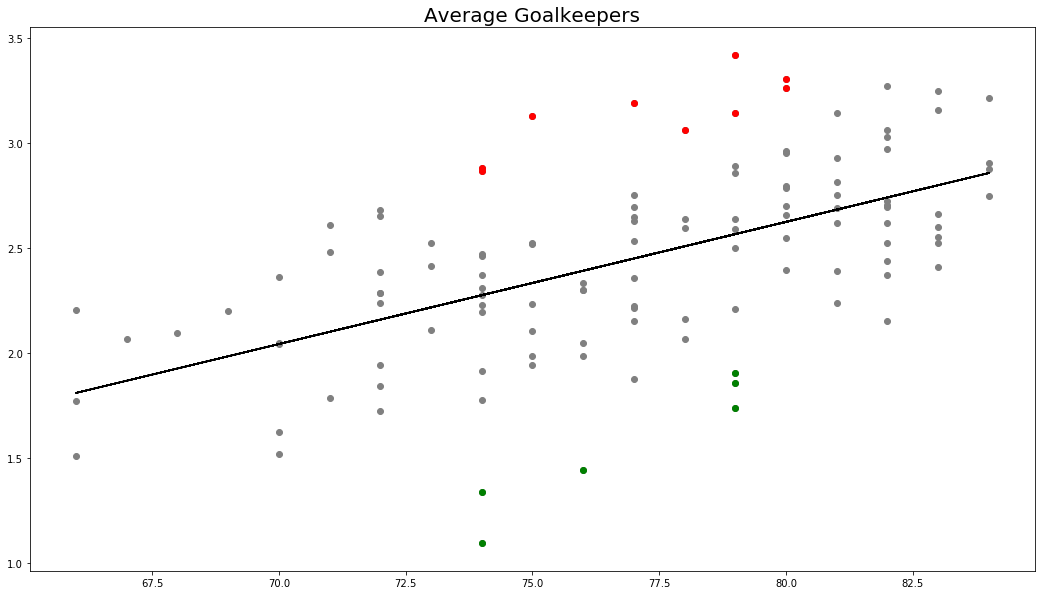

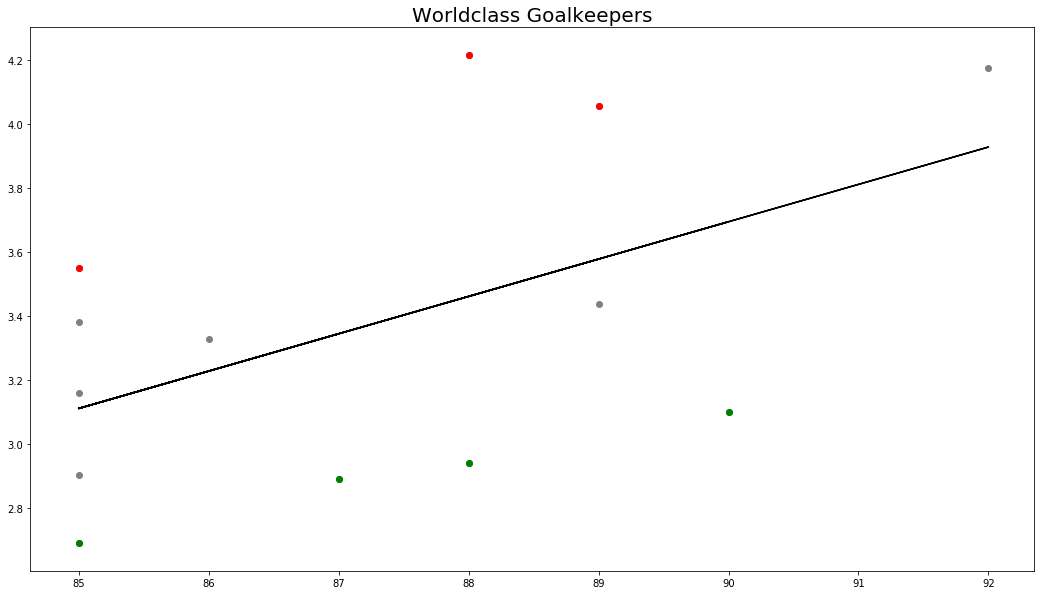

In [25]:
plt.figure(figsize=(18,10)) 
plt.scatter(w, z,color='grey') 
plt.scatter(t1, t2,color='red') 
plt.scatter(t3, t4,color='green') 
plt.plot(w, average_goalkeepers_model.predict(w),color='k') 
plt.title('Average Goalkeepers', fontsize=20) 
plt.show() 
plt.figure(figsize=(18,10)) 
plt.scatter(x, y,color='grey') 
plt.scatter(s1, s2,color='red') 
plt.scatter(s3, s4,color='green') 
plt.plot(x, worldclass_goalkeepers_model.predict(x),color='k') 
plt.title('Worldclass Goalkeepers', fontsize=20) 
plt.show()

## Defenders

In [26]:
RQ1_Defenders = RQ1[RQ1['Position'] == 'Defender']

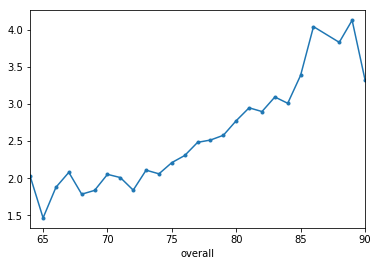

In [27]:
df = RQ1_Defenders.groupby(['overall']).mean()['Previous Average Form']
df.plot(style='.-')

In [28]:
RQ1_Defenders['Previous Average Form'].corr(RQ1_Defenders['overall'])

0.62626550414557958

In [29]:
worldclass_defenders = RQ1_Defenders[RQ1_Defenders['overall']>84]
average_defenders = RQ1_Defenders[RQ1_Defenders['overall']<85]

In [30]:
x = worldclass_defenders['overall'].values[:,np.newaxis]
y = worldclass_defenders['Previous Average Form'].values
worldclass_defenders_model = LinearRegression()
worldclass_defenders_model.fit(x, y)

w = average_defenders['overall'].values[:,np.newaxis]
z = average_defenders['Previous Average Form'].values
average_defenders_model = LinearRegression()
average_defenders_model.fit(w, z)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [31]:
average_defenders["Distance"] = average_defenders['Previous Average Form'].values - average_defenders_model.predict(average_defenders['overall'].values[:,np.newaxis])
worldclass_defenders["Distance"] = worldclass_defenders['Previous Average Form'].values - worldclass_defenders_model.predict(worldclass_defenders['overall'].values[:,np.newaxis])

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [32]:
pos_dist_def0 = average_defenders[average_defenders['Distance']>=0]['Distance'].mean()
pos_dist_def1 = worldclass_defenders[worldclass_defenders['Distance']>=0]['Distance'].mean()

neg_dist_def0 = average_defenders[average_defenders['Distance']<0]['Distance'].mean()
neg_dist_def1 = worldclass_defenders[worldclass_defenders['Distance']<0]['Distance'].mean()

In [33]:
underrated_average_def = average_defenders[average_defenders['Distance']>(pos_dist_def0*2)]
underrated_worldclass_def = worldclass_defenders[worldclass_defenders['Distance']>pos_dist_def1]

overrated_average_def = average_defenders[average_defenders['Distance']<(neg_dist_def0*2)]
overrated_worldclass_def = worldclass_defenders[worldclass_defenders['Distance']<neg_dist_def1]

In [34]:
underrated_average_def['Predicted Form (FIFA)'] = average_defenders_model.predict(underrated_average_def['overall'].values[:,np.newaxis])
underrated_worldclass_def['Predicted Form (FIFA)'] = worldclass_defenders_model.predict(underrated_worldclass_def['overall'].values[:,np.newaxis])

overrated_average_def['Predicted Form (FIFA)'] = average_defenders_model.predict(overrated_average_def['overall'].values[:,np.newaxis])
overrated_worldclass_def['Predicted Form (FIFA)'] = worldclass_defenders_model.predict(overrated_worldclass_def['overall'].values[:,np.newaxis])

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/p

In [35]:
underrated_average_def['Predicted Form (Us)'] = underrated_average_def['Previous Average Form']
underrated_worldclass_def['Predicted Form (Us)'] = underrated_worldclass_def['Previous Average Form']

overrated_average_def['Predicted Form (Us)'] = overrated_average_def['Previous Average Form']
overrated_worldclass_def['Predicted Form (Us)'] = overrated_worldclass_def['Previous Average Form']

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/p

In [36]:
underrated_defenders = pd.concat([underrated_average_def ,underrated_worldclass_def ],axis=0)

overrated_defenders = pd.concat([overrated_average_def ,overrated_worldclass_def ],axis=0)

In [93]:
underrated_defenders.sort_values('Distance', ascending=False).reset_index().drop('index',1)
underrated_defenders.head(5)

,Players,club,league,age,nationality,Position,overall,potential,eur_value,injury_prone_trait,Previous Average Form,Current Average Form,Apps This Season,Plays in Top 5 Leagues,Homegrown,Distance,Predicted Form (FIFA),Predicted Form (Us)
53,Almamy Toure,AS Monaco,French Ligue 1,21,Mali,Defender,73,81,5000000.0,True,4.033333,0.0,0.0,True,False,1.920929,2.112405,4.033333
60,Ashley Cole,LA Galaxy,USA Major League Soccer,36,England,Defender,71,71,270000.0,False,4.000000,0.0,0.0,False,True,2.051494,1.948506,4.000000
72,Stoppila Sunzu,Arsenal Tula,Russian Premier League,28,Zambia,Defender,71,72,2200000.0,False,3.878788,0.0,0.0,False,False,1.930282,1.948506,3.878788
79,Jose Maria Gimenez,Atletico Madrid,Spanish Primera Division,22,Uruguay,Defender,83,87,28500000.0,False,3.843750,3.7,20.0,True,False,0.911853,2.931897,3.843750
85,Fabinho,AS Monaco,French Ligue 1,23,Brazil,Defender,83,88,29500000.0,False,3.785185,0.0,0.0,True,False,0.853288,2.931897,3.785185


In [92]:
overrated_defenders.sort_values('Distance', ascending=True).reset_index().drop('index',1)
overrated_defenders.head(5)

,Players,club,league,age,nationality,Position,overall,potential,eur_value,injury_prone_trait,Previous Average Form,Current Average Form,Apps This Season,Plays in Top 5 Leagues,Homegrown,Distance,Predicted Form (FIFA),Predicted Form (Us)
1537,Salif Sane,Hannover 96,German Bundesliga,26,Senegal,Defender,79,81,12500000.0,False,1.796117,2.206897,29.0,True,False,-0.807984,2.604100,1.796117
1587,Niklas Stark,Hertha BSC Berlin,German Bundesliga,22,Germany,Defender,78,85,12500000.0,False,1.736111,2.600000,25.0,True,True,-0.786040,2.522151,1.736111
1672,Emiliano Insua,VfB Stuttgart,German Bundesliga,28,Argentina,Defender,76,76,6000000.0,False,1.621212,2.772727,22.0,True,False,-0.737040,2.358253,1.621212
1675,Ciaran Clark,Newcastle United,English Premier League,27,Republic of Ireland,Defender,76,77,7500000.0,False,1.616162,2.550000,20.0,True,False,-0.742091,2.358253,1.616162
1677,Cristiano Piccini,Sporting CP,Portuguese Primeira Liga,24,Italy,Defender,76,81,8500000.0,True,1.610169,0.000000,0.0,False,True,-0.748083,2.358253,1.610169


In [39]:
t1 = underrated_average_def['overall'].values[:,np.newaxis] 
t2 = underrated_average_def['Previous Average Form'].values 
t3 = overrated_average_def['overall'].values[:,np.newaxis] 
t4 = overrated_average_def['Previous Average Form'].values 
s1 = underrated_worldclass_def['overall'].values[:,np.newaxis] 
s2 = underrated_worldclass_def['Previous Average Form'].values 
s3 = overrated_worldclass_def['overall'].values[:,np.newaxis] 
s4 = overrated_worldclass_def['Previous Average Form'].values

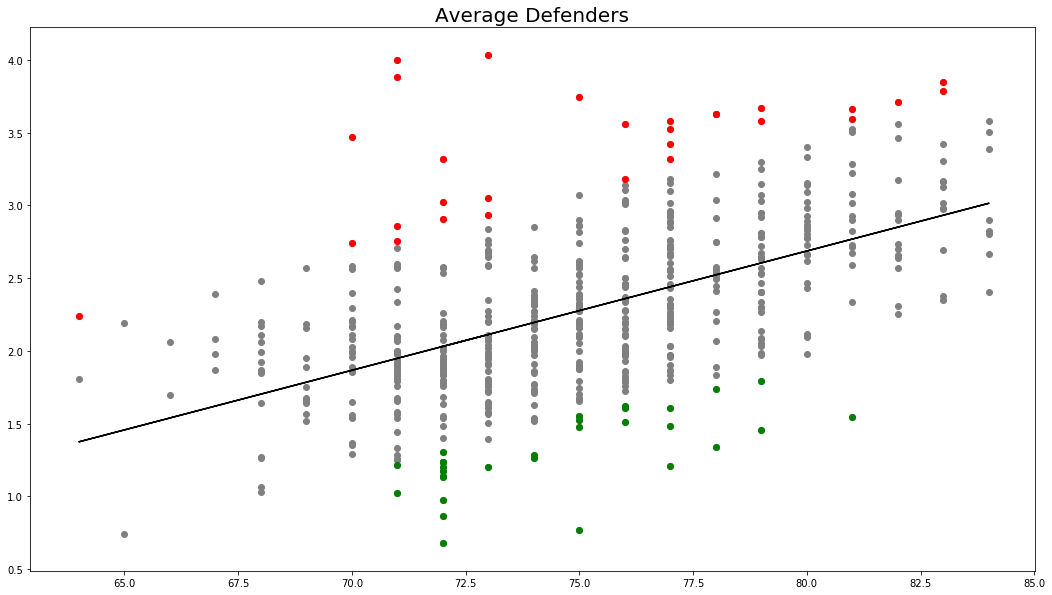

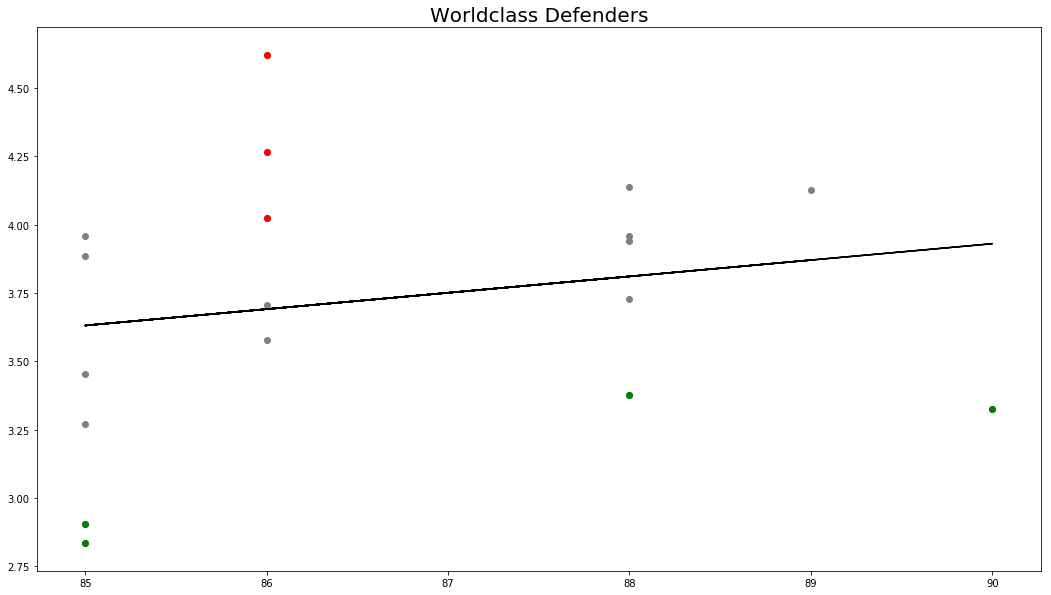

In [40]:
plt.figure(figsize=(18,10)) 
plt.scatter(w, z,color='grey') 
plt.scatter(t1, t2,color='red') 
plt.scatter(t3, t4,color='green') 
plt.plot(w, average_defenders_model.predict(w),color='k') 
plt.title('Average Defenders', fontsize=20) 
plt.show() 
plt.figure(figsize=(18,10)) 
plt.scatter(x, y,color='grey') 
plt.scatter(s1, s2,color='red') 
plt.scatter(s3, s4,color='green') 
plt.plot(x, worldclass_defenders_model.predict(x),color='k') 
plt.title('Worldclass Defenders', fontsize=20) 
plt.show()

## Midfielders

In [41]:
RQ1_Midfielders = RQ1[RQ1['Position'] == 'Midfielder']

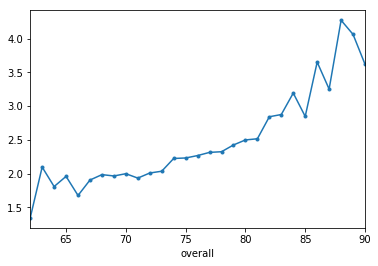

In [42]:
mid = RQ1_Midfielders.groupby(['overall']).mean()['Previous Average Form']
mid.plot(style='.-')

In [43]:
RQ1_Midfielders['Previous Average Form'].corr(RQ1_Midfielders['overall'])

0.56668684897250821

In [44]:
worldclass_midfielders = RQ1_Midfielders[RQ1_Midfielders['overall']>84]
average_midfielders = RQ1_Midfielders[RQ1_Midfielders['overall']<85]

In [45]:
x = worldclass_midfielders['overall'].values[:,np.newaxis]
y = worldclass_midfielders['Previous Average Form'].values
worldclass_midfielders_model = LinearRegression()
worldclass_midfielders_model.fit(x, y)

w = average_midfielders['overall'].values[:,np.newaxis]
z = average_midfielders['Previous Average Form'].values
average_midfielders_model = LinearRegression()
average_midfielders_model.fit(w, z)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [47]:
average_midfielders["Distance"] = average_midfielders['Previous Average Form'].values - average_midfielders_model.predict(average_midfielders['overall'].values[:,np.newaxis])
worldclass_midfielders["Distance"] = worldclass_midfielders['Previous Average Form'].values - worldclass_midfielders_model.predict(worldclass_midfielders['overall'].values[:,np.newaxis])

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [48]:
pos_dist_mid0 = average_midfielders[average_midfielders['Distance']>=0]['Distance'].mean()
pos_dist_mid1 = worldclass_midfielders[worldclass_midfielders['Distance']>=0]['Distance'].mean()

neg_dist_mid0 = average_midfielders[average_midfielders['Distance']<0]['Distance'].mean()
neg_dist_mid1 = worldclass_midfielders[worldclass_midfielders['Distance']<0]['Distance'].mean()

In [49]:
underrated_average_mid = average_midfielders[average_midfielders['Distance']>(pos_dist_mid0*2)]
underrated_worldclass_mid = worldclass_midfielders[worldclass_midfielders['Distance']>pos_dist_mid1]

overrated_average_mid = average_midfielders[average_midfielders['Distance']<(neg_dist_mid0*2)]
overrated_worldclass_mid = worldclass_midfielders[worldclass_midfielders['Distance']<neg_dist_mid1]

In [50]:
underrated_average_mid['Predicted Form (FIFA)'] = average_midfielders_model.predict(underrated_average_mid['overall'].values[:,np.newaxis])
underrated_worldclass_mid['Predicted Form (FIFA)'] = worldclass_midfielders_model.predict(underrated_worldclass_mid['overall'].values[:,np.newaxis])

overrated_average_mid['Predicted Form (FIFA)'] = average_midfielders_model.predict(overrated_average_mid['overall'].values[:,np.newaxis])
overrated_worldclass_mid['Predicted Form (FIFA)'] = worldclass_midfielders_model.predict(overrated_worldclass_mid['overall'].values[:,np.newaxis])

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/p

In [51]:
underrated_average_mid['Predicted Form (Us)'] = underrated_average_mid['Previous Average Form']
underrated_worldclass_mid['Predicted Form (Us)'] = underrated_worldclass_mid['Previous Average Form']

overrated_average_mid['Predicted Form (Us)'] = overrated_average_mid['Previous Average Form']
overrated_worldclass_mid['Predicted Form (Us)'] = overrated_worldclass_mid['Previous Average Form']

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/p

In [52]:
underrated_midfielders = pd.concat([underrated_average_mid ,underrated_worldclass_mid ],axis=0)

overrated_midfielders = pd.concat([overrated_average_mid ,overrated_worldclass_mid ],axis=0)

In [100]:
underrated_midfielders.sort_values('Distance', ascending=False).reset_index().drop('index',1)
underrated_midfielders.head(5)

,Players,club,league,age,nationality,Position,overall,potential,eur_value,injury_prone_trait,Previous Average Form,Current Average Form,Apps This Season,Plays in Top 5 Leagues,Homegrown,Distance,Predicted Form (FIFA),Predicted Form (Us)
15,Max Kruse,SV Werder Bremen,German Bundesliga,29,Germany,Midfielder,82,82,22000000.0,False,5.017544,3.730769,26.0,True,True,2.344844,2.672700,5.017544
27,Alexander Meier,Eintracht Frankfurt,German Bundesliga,34,Germany,Midfielder,77,77,4700000.0,True,4.563025,0.000000,0.0,True,True,2.199240,2.363785,4.563025
28,Dele Alli,Tottenham Hotspur,English Premier League,21,England,Midfielder,84,90,43000000.0,False,4.428571,4.064516,31.0,True,True,1.632306,2.796266,4.428571
58,Dimitri Payet,Olympique de Marseille,French Ligue 1,30,France,Midfielder,83,83,24500000.0,False,4.005780,0.000000,0.0,True,True,1.271298,2.734483,4.005780
62,Ousmane Dembele,FC Barcelona,Spanish Primera Division,20,France,Midfielder,83,92,40000000.0,False,3.965517,3.000000,13.0,True,True,1.231034,2.734483,3.965517


In [101]:
overrated_midfielders.sort_values('Distance', ascending=False).reset_index().drop('index',1)
overrated_midfielders.head(5)

,Players,club,league,age,nationality,Position,overall,potential,eur_value,injury_prone_trait,Previous Average Form,Current Average Form,Apps This Season,Plays in Top 5 Leagues,Homegrown,Distance,Predicted Form (FIFA),Predicted Form (Us)
1230,Idrissa Gana Gueye,Everton,English Premier League,27,Senegal,Midfielder,83,84,24500000.0,False,2.036364,2.034483,29.0,True,False,-0.698119,2.734483,2.036364
1329,Mateo Kovacic,Real Madrid CF,Spanish Primera Division,23,Croatia,Midfielder,82,88,30000000.0,False,1.969466,1.529412,17.0,True,False,-0.703234,2.672700,1.969466
1364,Granit Xhaka,Arsenal,English Premier League,24,Switzerland,Midfielder,82,85,27500000.0,False,1.950000,2.363636,33.0,True,False,-0.722700,2.672700,1.950000
1368,Moussa Dembele,Tottenham Hotspur,English Premier League,29,Belgium,Midfielder,83,83,25000000.0,False,1.947826,1.518519,27.0,True,False,-0.786657,2.734483,1.947826
1374,Roque Mesa,Swansea City,English Premier League,28,Spain,Midfielder,82,82,18000000.0,False,1.942029,0.000000,0.0,True,True,-0.730671,2.672700,1.942029


In [102]:
t1 = underrated_average_mid['overall'].values[:,np.newaxis] 
t2 = underrated_average_mid['Previous Average Form'].values 
t3 = overrated_average_mid['overall'].values[:,np.newaxis] 
t4 = overrated_average_mid['Previous Average Form'].values 
s1 = underrated_worldclass_mid['overall'].values[:,np.newaxis] 
s2 = underrated_worldclass_mid['Previous Average Form'].values 
s3 = overrated_worldclass_mid['overall'].values[:,np.newaxis] 
s4 = overrated_worldclass_mid['Previous Average Form'].values

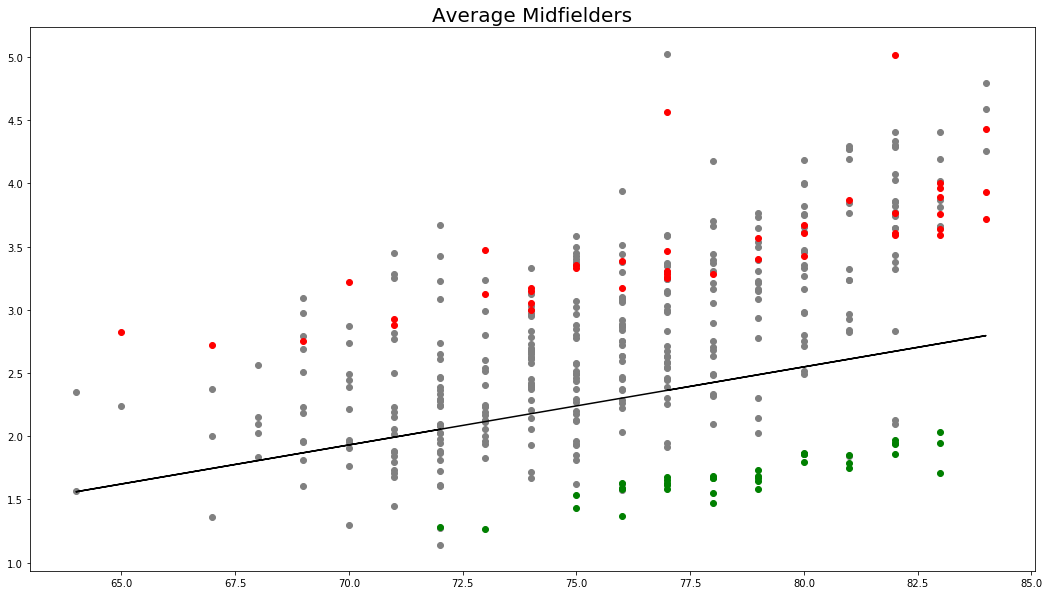

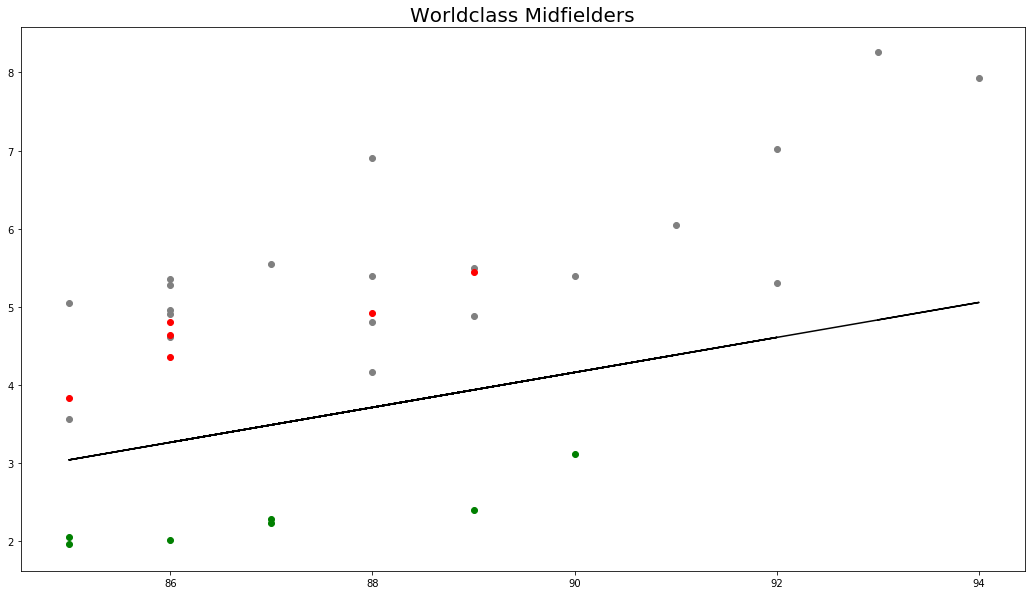

In [103]:
plt.figure(figsize=(18,10)) 
plt.scatter(w, z,color='grey') 
plt.scatter(t1, t2,color='red') 
plt.scatter(t3, t4,color='green') 
plt.plot(w, average_midfielders_model.predict(w),color='k') 
plt.title('Average Midfielders', fontsize=20) 
plt.show() 
plt.figure(figsize=(18,10)) 
plt.scatter(x, y,color='grey') 
plt.scatter(s1, s2,color='red') 
plt.scatter(s3, s4,color='green') 
plt.plot(x, worldclass_midfielders_model.predict(x),color='k') 
plt.title('Worldclass Midfielders', fontsize=20) 
plt.show()

## Forwards

In [55]:
RQ1_Forwards = RQ1[RQ1['Position'] == 'Forward']

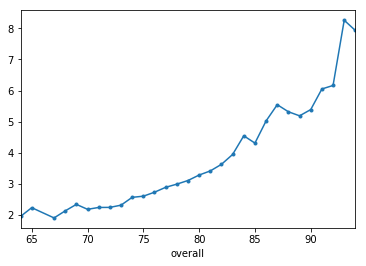

In [56]:
fwd = RQ1_Forwards.groupby(['overall']).mean()['Previous Average Form']
fwd.plot(style='.-')

In [57]:
RQ1_Forwards['Previous Average Form'].corr(RQ1_Forwards['overall'])

0.78310468353909879

In [58]:
worldclass_forwards = RQ1_Forwards[RQ1_Forwards['overall']>84]
average_forwards = RQ1_Forwards[RQ1_Forwards['overall']<85]

In [59]:
x = worldclass_forwards['overall'].values[:,np.newaxis]
y = worldclass_forwards['Previous Average Form'].values
worldclass_forwards_model = LinearRegression()
worldclass_forwards_model.fit(x, y)

w = average_forwards['overall'].values[:,np.newaxis]
z = average_forwards['Previous Average Form'].values
average_forwards_model = LinearRegression()
average_forwards_model.fit(w, z)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [61]:
average_forwards["Distance"] = average_forwards['Previous Average Form'].values - average_forwards_model.predict(average_forwards['overall'].values[:,np.newaxis])
worldclass_forwards["Distance"] = worldclass_forwards['Previous Average Form'].values - worldclass_forwards_model.predict(worldclass_forwards['overall'].values[:,np.newaxis])

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [62]:
pos_dist_fwd0 = average_forwards[average_forwards['Distance']>=0]['Distance'].mean()
pos_dist_fwd1 = worldclass_forwards[worldclass_forwards['Distance']>=0]['Distance'].mean()

neg_dist_fwd0 = average_forwards[average_forwards['Distance']<0]['Distance'].mean()
neg_dist_fwd1 = worldclass_forwards[worldclass_forwards['Distance']<0]['Distance'].mean()

In [63]:
underrated_average_fwd = average_forwards[average_forwards['Distance']>(pos_dist_mid0*2)]
underrated_worldclass_fwd = worldclass_forwards[worldclass_forwards['Distance']>pos_dist_mid1]

overrated_average_fwd = average_forwards[average_forwards['Distance']<(neg_dist_mid0*2)]
overrated_worldclass_fwd = worldclass_forwards[worldclass_forwards['Distance']<neg_dist_mid1]

In [64]:
underrated_average_fwd['Predicted Form (FIFA)'] = average_forwards_model.predict(underrated_average_fwd['overall'].values[:,np.newaxis])
underrated_worldclass_fwd['Predicted Form (FIFA)'] = worldclass_forwards_model.predict(underrated_worldclass_fwd['overall'].values[:,np.newaxis])

overrated_average_fwd['Predicted Form (FIFA)'] = average_forwards_model.predict(overrated_average_fwd['overall'].values[:,np.newaxis])
overrated_worldclass_fwd['Predicted Form (FIFA)'] = worldclass_forwards_model.predict(overrated_worldclass_fwd['overall'].values[:,np.newaxis])

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/p

In [65]:
underrated_average_fwd['Predicted Form (Us)'] = underrated_average_fwd['Previous Average Form']
underrated_worldclass_fwd['Predicted Form (Us)'] = underrated_worldclass_fwd['Previous Average Form']

overrated_average_fwd['Predicted Form (Us)'] = overrated_average_fwd['Previous Average Form']
overrated_worldclass_fwd['Predicted Form (Us)'] = overrated_worldclass_fwd['Previous Average Form']

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/p

In [66]:
underrated_forwards = pd.concat([underrated_average_fwd ,underrated_worldclass_fwd ],axis=0)

overrated_forwards = pd.concat([overrated_average_fwd ,overrated_worldclass_fwd ],axis=0)

In [67]:
underrated_forwards.sort_values('Distance', ascending=False).reset_index().drop('index',1)

,Players,club,league,age,nationality,Position,overall,potential,eur_value,injury_prone_trait,Previous Average Form,Current Average Form,Apps This Season,Plays in Top 5 Leagues,Homegrown,Distance,Predicted Form (FIFA),Predicted Form (Us)
0,Robin van Persie,Fenerbahce SK,Turkish Super Lig,33,Netherlands,Forward,77,77,5500000.0,True,5.023256,0.000000,0.0,False,False,2.089209,2.934047,5.023256
1,Zlatan Ibrahimovic,Manchester United,English Premier League,35,Sweden,Forward,88,88,27000000.0,False,6.900000,1.200000,5.0,True,False,1.500181,5.399819,6.900000
2,German Denis,Club Atletico Lanus,Argentinian Superliga,35,Argentina,Forward,72,72,1400000.0,False,3.675000,0.000000,0.0,False,False,1.325258,2.349742,3.675000
3,Lionel Messi,FC Barcelona,Spanish Primera Division,30,Argentina,Forward,93,93,105000000.0,False,8.255952,7.375000,32.0,True,False,1.251361,7.004592,8.255952
4,Ikechukwu Uche,Gimnastic de Tarragona,Spanish Segunda Division,33,Nigeria,Forward,71,71,1500000.0,True,3.446429,0.000000,0.0,False,False,1.213548,2.232881,3.446429
5,Dario Cvitanich,Banfield,Argentinian Superliga,33,Argentina,Forward,76,76,4800000.0,False,3.942029,0.000000,0.0,False,False,1.124843,2.817186,3.942029
6,Charlie Austin,Southampton,English Premier League,27,England,Forward,78,78,11000000.0,True,4.175439,3.000000,20.0,True,True,1.124531,3.050908,4.175439
7,Mustapha Yatabare,Kardemir Karabukspor,Turkish Super Lig,31,Mali,Forward,69,69,950000.0,False,3.095238,0.000000,0.0,False,False,1.096079,1.999159,3.095238
8,Javi Guerra,Rayo Vallecano,Spanish Segunda Division,35,Spain,Forward,72,72,1400000.0,False,3.427273,0.000000,0.0,False,True,1.077531,2.349742,3.427273
9,Gonzalo Bergessio,Velez Sarsfield,Argentinian Superliga,32,Argentina,Forward,71,71,1900000.0,False,3.282353,0.000000,0.0,False,False,1.049472,2.232881,3.282353


In [68]:
overrated_forwards.sort_values('Distance', ascending=True).reset_index().drop('index',1)

,Players,club,league,age,nationality,Position,overall,potential,eur_value,injury_prone_trait,Previous Average Form,Current Average Form,Apps This Season,Plays in Top 5 Leagues,Homegrown,Distance,Predicted Form (FIFA),Predicted Form (Us)
0,Andres Guardado,Real Betis Balompie,Spanish Primera Division,30,Mexico,Forward,81,81,16500000.0,False,1.846154,2.851852,27.0,True,False,-1.555337,3.401491,1.846154
1,Manu Trigueros,Villarreal CF,Spanish Primera Division,25,Spain,Forward,82,85,27500000.0,False,2.094891,2.166667,30.0,True,True,-1.423461,3.518352,2.094891
2,Jonathan Dos Santos,LA Galaxy,USA Major League Soccer,27,Mexico,Forward,80,81,16500000.0,True,1.863158,0.000000,0.0,False,False,-1.421472,3.284630,1.863158
3,Yacine Brahimi,FC Porto,Portuguese Primeira Liga,27,Algeria,Forward,82,82,23000000.0,False,2.129032,0.000000,0.0,False,False,-1.389319,3.518352,2.129032
4,Neymar,Paris Saint-Germain,French Ligue 1,25,Brazil,Forward,92,94,123000000.0,False,5.306452,0.000000,0.0,True,False,-1.377186,6.683637,5.306452
5,Ricardo Horta,SC Braga,Portuguese Primeira Liga,22,Portugal,Forward,76,83,11000000.0,False,1.574468,0.000000,0.0,False,False,-1.242718,2.817186,1.574468
6,Paulo Dybala,Juventus,Italian Serie A,23,Argentina,Forward,88,93,79000000.0,False,4.166667,5.821429,28.0,True,False,-1.233153,5.399819,4.166667
7,Samuele Longo,CD Tenerife,Spanish Segunda Division,25,Italy,Forward,72,76,4100000.0,False,1.136364,0.000000,0.0,False,True,-1.213378,2.349742,1.136364
8,Jozy Altidore,Toronto FC,USA Major League Soccer,27,United States,Forward,76,76,8000000.0,True,1.619048,0.000000,0.0,False,False,-1.198138,2.817186,1.619048
9,Arkadiusz Milik,Napoli,Italian Serie A,23,Poland,Forward,79,86,18000000.0,True,2.024390,2.700000,10.0,True,False,-1.143379,3.167769,2.024390


In [104]:
t1 = underrated_average_fwd['overall'].values[:,np.newaxis] 
t2 = underrated_average_fwd['Previous Average Form'].values 
t3 = overrated_average_fwd['overall'].values[:,np.newaxis] 
t4 = overrated_average_fwd['Previous Average Form'].values 
s1 = underrated_worldclass_fwd['overall'].values[:,np.newaxis] 
s2 = underrated_worldclass_fwd['Previous Average Form'].values 
s3 = overrated_worldclass_fwd['overall'].values[:,np.newaxis] 
s4 = overrated_worldclass_fwd['Previous Average Form'].values

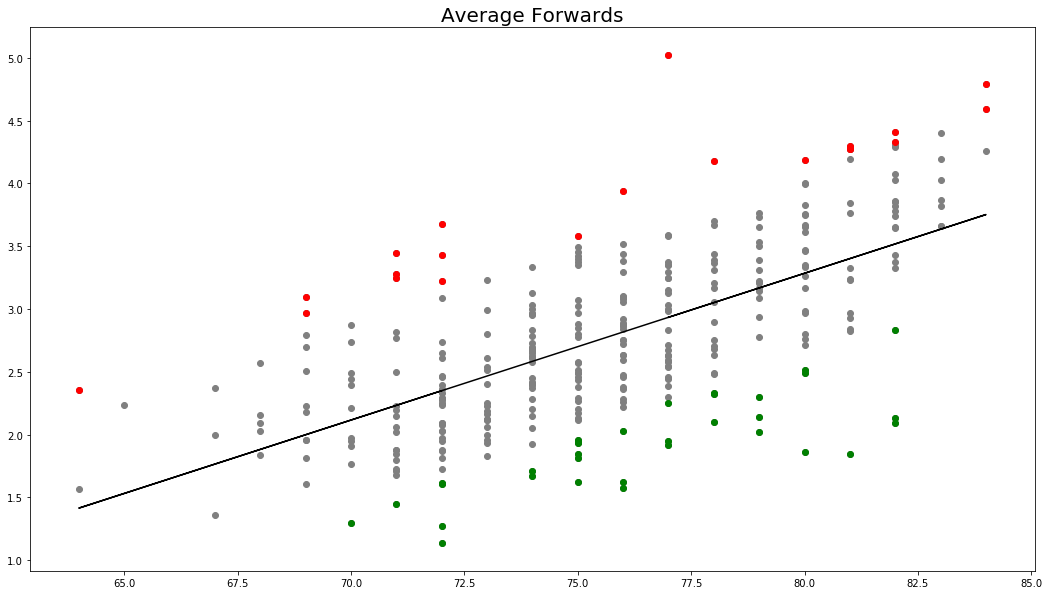

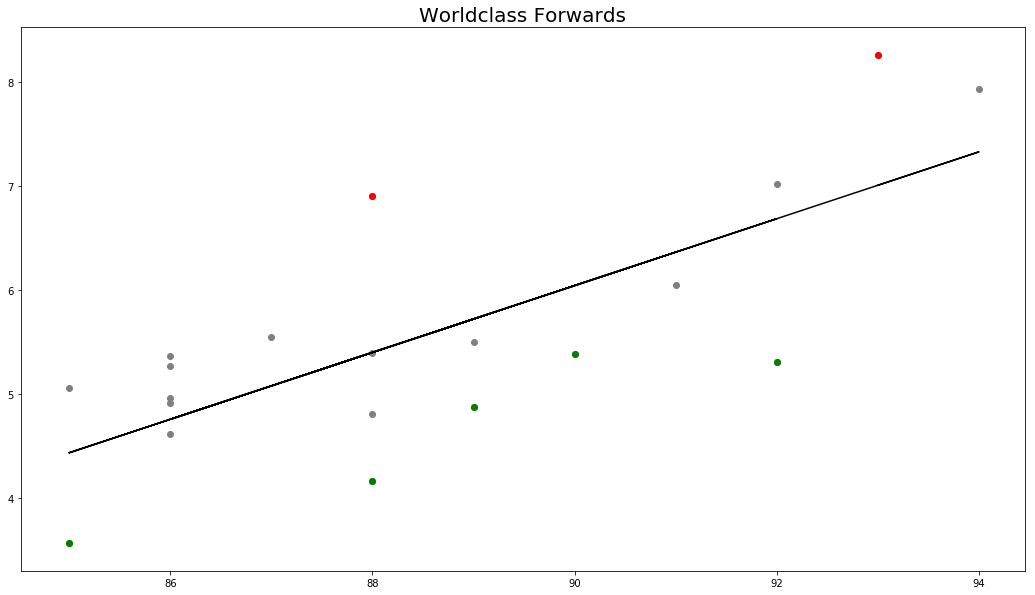

In [105]:
plt.figure(figsize=(18,10)) 
plt.scatter(w, z,color='grey') 
plt.scatter(t1, t2,color='red') 
plt.scatter(t3, t4,color='green') 
plt.plot(w, average_forwards_model.predict(w),color='k') 
plt.title('Average Forwards', fontsize=20) 
plt.show() 
plt.figure(figsize=(18,10)) 
plt.scatter(x, y,color='grey') 
plt.scatter(s1, s2,color='red') 
plt.scatter(s3, s4,color='green') 
plt.plot(x, worldclass_forwards_model.predict(x),color='k') 
plt.title('Worldclass Forwards', fontsize=20) 
plt.show()

## Who is more accurate

In [69]:
underrated_players = pd.concat([underrated_defenders,underrated_midfielders,underrated_forwards], axis=0).reset_index().drop('index',1)
underrated_players = underrated_players.sort_values('Distance', ascending=False).reset_index().drop('index',1)

In [70]:
underrated_players.head(10)

,Players,club,league,age,nationality,Position,overall,potential,eur_value,injury_prone_trait,Previous Average Form,Current Average Form,Apps This Season,Plays in Top 5 Leagues,Homegrown,Distance,Predicted Form (FIFA),Predicted Form (Us)
0,Max Kruse,SV Werder Bremen,German Bundesliga,29,Germany,Midfielder,82,82,22000000.0,False,5.017544,3.730769,26.0,True,True,2.344844,2.672700,5.017544
1,Alexander Meier,Eintracht Frankfurt,German Bundesliga,34,Germany,Midfielder,77,77,4700000.0,True,4.563025,0.000000,0.0,True,True,2.199240,2.363785,4.563025
2,Robin van Persie,Fenerbahce SK,Turkish Super Lig,33,Netherlands,Forward,77,77,5500000.0,True,5.023256,0.000000,0.0,False,False,2.089209,2.934047,5.023256
3,Ashley Cole,LA Galaxy,USA Major League Soccer,36,England,Defender,71,71,270000.0,False,4.000000,0.000000,0.0,False,True,2.051494,1.948506,4.000000
4,Stoppila Sunzu,Arsenal Tula,Russian Premier League,28,Zambia,Defender,71,72,2200000.0,False,3.878788,0.000000,0.0,False,False,1.930282,1.948506,3.878788
5,Almamy Toure,AS Monaco,French Ligue 1,21,Mali,Defender,73,81,5000000.0,True,4.033333,0.000000,0.0,True,False,1.920929,2.112405,4.033333
6,Dele Alli,Tottenham Hotspur,English Premier League,21,England,Midfielder,84,90,43000000.0,False,4.428571,4.064516,31.0,True,True,1.632306,2.796266,4.428571
7,Francois Clerc,GFC Ajaccio,French Ligue 2,34,France,Defender,70,70,500000.0,True,3.470588,0.000000,0.0,False,True,1.604031,1.866557,3.470588
8,Marco Reus,Borussia Dortmund,German Bundesliga,28,Germany,Midfielder,86,86,45000000.0,True,4.806452,4.875000,8.0,True,True,1.540520,3.265931,4.806452
9,Gareth Bale,Real Madrid CF,Spanish Primera Division,27,Wales,Midfielder,89,89,69500000.0,True,5.451128,4.318182,22.0,True,False,1.513796,3.937332,5.451128


In [71]:
underrated_players.mean()['age']

29.116504854368934

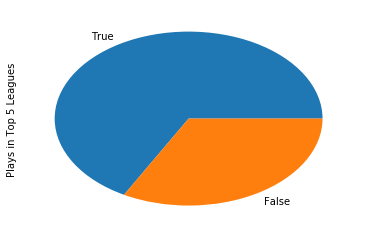

In [72]:
underrated_players['Plays in Top 5 Leagues'].value_counts().plot(kind='pie')

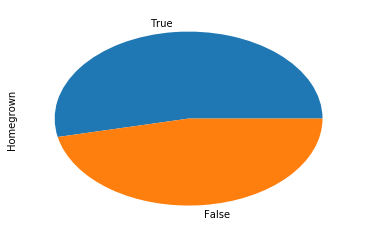

In [73]:
underrated_players['Homegrown'].value_counts().plot(kind='pie')

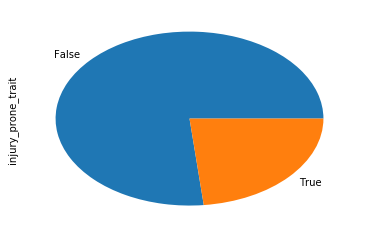

In [74]:
underrated_players.injury_prone_trait.value_counts().plot(kind='pie')

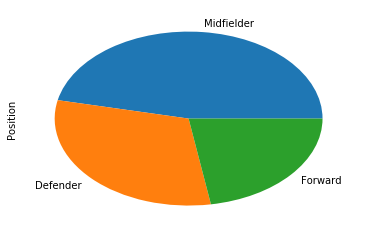

In [75]:
underrated_players['Position'].value_counts().plot(kind='pie')

In [76]:
overrated_players = pd.concat([overrated_defenders,overrated_midfielders,overrated_forwards], axis=0).reset_index().drop('index',1)
overrated_players = overrated_players.sort_values('Distance', ascending=True).reset_index().drop('index',1)

In [77]:
overrated_players.head(10)

,Players,club,league,age,nationality,Position,overall,potential,eur_value,injury_prone_trait,Previous Average Form,Current Average Form,Apps This Season,Plays in Top 5 Leagues,Homegrown,Distance,Predicted Form (FIFA),Predicted Form (Us)
0,Andres Guardado,Real Betis Balompie,Spanish Primera Division,30,Mexico,Forward,81,81,16500000.0,False,1.846154,2.851852,27.0,True,False,-1.555337,3.401491,1.846154
1,Luka Modric,Real Madrid CF,Spanish Primera Division,31,Croatia,Midfielder,89,89,57000000.0,False,2.400000,2.608696,23.0,True,False,-1.537332,3.937332,2.400000
2,Fernando Amorebieta,Independiente,Argentinian Superliga,32,Venezuela,Defender,75,75,3800000.0,False,0.770492,0.000000,0.0,False,False,-1.505811,2.276303,0.770492
3,Manu Trigueros,Villarreal CF,Spanish Primera Division,25,Spain,Forward,82,85,27500000.0,False,2.094891,2.166667,30.0,True,True,-1.423461,3.518352,2.094891
4,Jonathan Dos Santos,LA Galaxy,USA Major League Soccer,27,Mexico,Forward,80,81,16500000.0,True,1.863158,0.000000,0.0,False,False,-1.421472,3.284630,1.863158
5,Yacine Brahimi,FC Porto,Portuguese Primeira Liga,27,Algeria,Forward,82,82,23000000.0,False,2.129032,0.000000,0.0,False,False,-1.389319,3.518352,2.129032
6,Neymar,Paris Saint-Germain,French Ligue 1,25,Brazil,Forward,92,94,123000000.0,False,5.306452,0.000000,0.0,True,False,-1.377186,6.683637,5.306452
7,Marco Capuano,Cagliari,Italian Serie A,25,Italy,Defender,72,76,3400000.0,False,0.679245,1.800000,20.0,True,True,-1.351210,2.030455,0.679245
8,Marco Verratti,Paris Saint-Germain,French Ligue 1,24,Italy,Midfielder,87,91,64500000.0,False,2.231343,0.000000,0.0,True,True,-1.258388,3.489731,2.231343
9,Sergio Busquets,FC Barcelona,Spanish Primera Division,28,Spain,Midfielder,86,86,36000000.0,False,2.018293,2.240000,25.0,True,True,-1.247639,3.265931,2.018293


In [78]:
overrated_players.mean()['age']

26.282051282051281

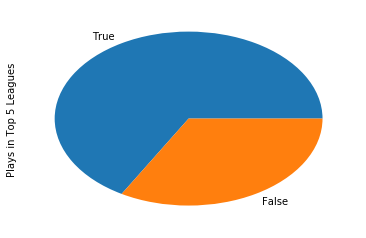

In [79]:
overrated_players['Plays in Top 5 Leagues'].value_counts().plot(kind='pie')

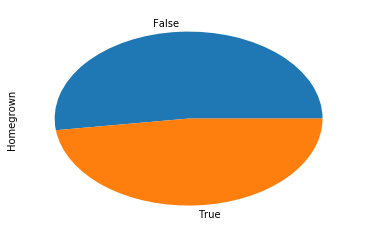

In [80]:
overrated_players['Homegrown'].value_counts().plot(kind='pie')

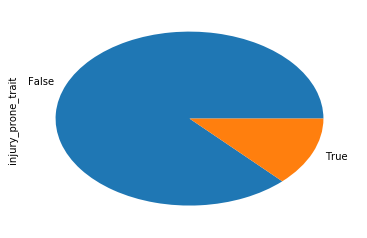

In [81]:
overrated_players.injury_prone_trait.value_counts().plot(kind='pie')

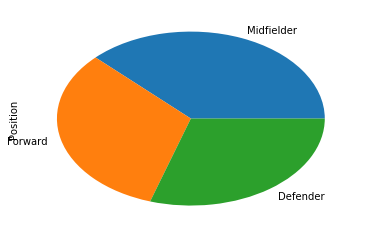

In [82]:
overrated_players['Position'].value_counts().plot(kind='pie')

# Part 2

In [83]:
underrated_players = underrated_players[underrated_players['Apps This Season']>0]
overrated_players = overrated_players[overrated_players['Apps This Season']>0]

In [84]:
underrated_players['FIFA'] = abs(underrated_players['Current Average Form'] - underrated_players['Predicted Form (FIFA)'])
underrated_players['Us'] = abs(underrated_players['Current Average Form'] - underrated_players['Predicted Form (Us)'])

In [85]:
underrated_players.loc[underrated_players['FIFA']<underrated_players['Us'],'Verdict'] = 'FIFA'
underrated_players.loc[underrated_players['FIFA']>underrated_players['Us'],'Verdict'] = 'Us'
underrated_players.loc[underrated_players['FIFA'] == underrated_players['Us'],'Verdict'] = 'Same'

Text(0.5,1,'Underrated Players')

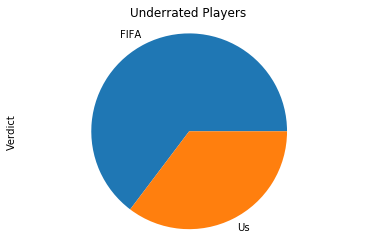

In [86]:
underrated_players.Verdict.value_counts().plot(kind='pie')
plt.axis('equal')
plt.title('Underrated Players')

In [87]:
underrated_players = underrated_players[underrated_players['Verdict']=='Us']
underrated_players.head(10)

,Players,club,league,age,nationality,Position,overall,potential,eur_value,injury_prone_trait,...,Current Average Form,Apps This Season,Plays in Top 5 Leagues,Homegrown,Distance,Predicted Form (FIFA),Predicted Form (Us),FIFA,Us,Verdict
6,Dele Alli,Tottenham Hotspur,English Premier League,21,England,Midfielder,84,90,43000000.0,False,...,4.064516,31.0,True,True,1.632306,2.796266,4.428571,1.268250,0.364055,Us
8,Marco Reus,Borussia Dortmund,German Bundesliga,28,Germany,Midfielder,86,86,45000000.0,True,...,4.875000,8.0,True,True,1.540520,3.265931,4.806452,1.609069,0.068548,Us
13,Junior Stanislas,Bournemouth,English Premier League,27,England,Midfielder,73,73,4200000.0,False,...,3.473684,19.0,True,True,1.359537,2.116653,3.476190,1.357031,0.002506,Us
25,Roberto Firmino,Liverpool,English Premier League,25,Brazil,Midfielder,83,86,33000000.0,False,...,4.647059,34.0,True,False,1.156426,2.734483,3.890909,1.912576,0.756150,Us
26,Sadio Mane,Liverpool,English Premier League,25,Senegal,Midfielder,84,87,39000000.0,False,...,4.370370,27.0,True,False,1.139904,2.796266,3.936170,1.574105,0.434200,Us
27,Lucas Hernandez,Atletico Madrid,Spanish Primera Division,21,France,Defender,77,88,13500000.0,False,...,4.304348,23.0,True,True,1.136721,2.440202,3.576923,1.864146,0.727425,Us
37,James Rodriguez,FC Bayern Munich,German Bundesliga,25,Colombia,Midfielder,86,89,56000000.0,False,...,4.428571,21.0,True,False,1.091212,3.265931,4.357143,1.162640,0.071429,Us
46,Mauro Icardi,Inter,Italian Serie A,24,Argentina,Forward,84,89,42000000.0,False,...,6.448276,29.0,True,False,1.041475,3.752074,4.793548,2.696202,1.654727,Us
63,Alejandro Dario Gomez,Atalanta,Italian Serie A,29,Argentina,Midfielder,84,84,31000000.0,False,...,3.714286,28.0,True,False,0.921292,2.796266,3.717557,0.918020,0.003272,Us
64,Anthony Martial,Manchester United,English Premier League,21,France,Midfielder,82,90,33000000.0,False,...,3.714286,28.0,True,True,0.920520,2.672700,3.593220,1.041586,0.121065,Us


In [88]:
overrated_players['FIFA'] = abs(overrated_players['Current Average Form'] - overrated_players['Predicted Form (FIFA)'])
overrated_players['Us'] = abs(overrated_players['Current Average Form'] - overrated_players['Predicted Form (Us)'])

In [89]:
overrated_players.loc[overrated_players['FIFA']<overrated_players['Us'],'Verdict'] = 'FIFA'
overrated_players.loc[overrated_players['FIFA']>overrated_players['Us'],'Verdict'] = 'Us'
overrated_players.loc[overrated_players['FIFA'] == overrated_players['Us'],'Verdict'] = 'Same'

Text(0.5,1,'Overrated Players')

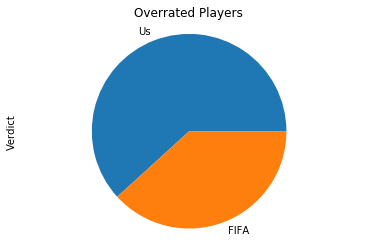

In [90]:
overrated_players.Verdict.value_counts().plot(kind='pie')
plt.axis('equal')
plt.title('Overrated Players')

In [91]:
overrated_players[overrated_players['Verdict']=='Us'].head(10)

,Players,club,league,age,nationality,Position,overall,potential,eur_value,injury_prone_trait,...,Current Average Form,Apps This Season,Plays in Top 5 Leagues,Homegrown,Distance,Predicted Form (FIFA),Predicted Form (Us),FIFA,Us,Verdict
1,Luka Modric,Real Madrid CF,Spanish Primera Division,31,Croatia,Midfielder,89,89,57000000.0,False,...,2.608696,23.0,True,False,-1.537332,3.937332,2.400000,1.328636,0.208696,Us
3,Manu Trigueros,Villarreal CF,Spanish Primera Division,25,Spain,Forward,82,85,27500000.0,False,...,2.166667,30.0,True,True,-1.423461,3.518352,2.094891,1.351685,0.071776,Us
9,Sergio Busquets,FC Barcelona,Spanish Primera Division,28,Spain,Midfielder,86,86,36000000.0,False,...,2.240000,25.0,True,True,-1.247639,3.265931,2.018293,1.025931,0.221707,Us
15,N'Golo Kante,Chelsea,English Premier League,26,France,Midfielder,87,90,52500000.0,False,...,2.166667,30.0,True,True,-1.205328,3.489731,2.284404,1.323065,0.117737,Us
17,Jorge Mere,1. FC Koln,German Bundesliga,20,Spain,Defender,78,84,12000000.0,False,...,1.421053,19.0,True,True,-1.182865,2.522151,1.339286,1.101098,0.081767,Us
23,Erik Moran,CD Leganes,Spanish Primera Division,26,Spain,Forward,72,76,3300000.0,False,...,1.000000,6.0,True,True,-1.073880,2.349742,1.275862,1.349742,0.275862,Us
25,Toni Kroos,Real Madrid CF,Spanish Primera Division,27,Germany,Midfielder,90,90,79000000.0,False,...,3.521739,23.0,True,True,-1.041132,4.161132,3.120000,0.639393,0.401739,Us
26,John Guidetti,RC Celta de Vigo,Spanish Primera Division,25,Sweden,Forward,79,83,16500000.0,False,...,2.333333,21.0,True,False,-1.027144,3.167769,2.140625,0.834435,0.192708,Us
27,Javier Mascherano,FC Barcelona,Spanish Primera Division,33,Argentina,Midfielder,83,83,10500000.0,False,...,1.857143,7.0,True,False,-1.024338,2.734483,1.710145,0.877340,0.146998,Us
29,Recio,Malaga CF,Spanish Primera Division,26,Spain,Forward,77,81,9500000.0,False,...,2.045455,22.0,True,True,-0.987893,2.934047,1.946154,0.888592,0.099301,Us
